In [152]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [190]:
"""
SELECT TOP 1500 de,plx,ra,vmag,(vmag+5*(LOG10(ABS(plx*1000.)+0.0000001)+1))as absmag FROM public.hipparcos  WHERE CONTAINS(POINT('ICRS',public.hipparcos.ra,public.hipparcos.de),BOX('ICRS',82.5,0,80,80))=1    AND  (vmag<7) ORDER BY absmag ASC


SELECT TOP 500 de,plx,ra,vmag FROM public.hipparcos  WHERE CONTAINS(POINT('ICRS',public.hipparcos.ra,public.hipparcos.de),BOX('ICRS',82.5,0,15,24))=1    AND  (vmag<7)
SELECT TOP 20 de,plx,ra,vmag FROM public.hipparcos  WHERE CONTAINS(POINT('ICRS',public.hipparcos.ra,public.hipparcos.de),BOX('ICRS',82.5,0,15,20))=1    AND  (vmag<7) ORDER BY vmag ASC
"""
"de,plx,ra,vmag"
const = np.loadtxt("result.csv",delimiter=",",skiprows=1,converters = {3: lambda s: float(s.strip() or 0)})
const_main = np.loadtxt("result_main.csv",delimiter=",",skiprows=1,converters = {3: lambda s: float(s.strip() or 0)})[0:12]

In [198]:
ra0, dec0 = 84/180.*np.pi,0
ra, dec, plx = const[:,2]/180.*np.pi, const[:,0]/180.*np.pi, const[:,1]
dst = 1000./(plx)
flx = 0.5*np.exp((13.-const[:,3])/2.51)
lum = 0.5*np.exp((13.-const[:,4])/2.51)
x = np.cos(dec-dec0)*np.cos(ra-ra0)*dst
y = np.cos(dec-dec0)*np.sin(ra-ra0)*dst
z = np.sin(dec-dec0)*dst

ra_m, dec_m, plx_m = const_main[:,2]/180.*np.pi, const_main[:,0]/180.*np.pi, const_main[:,1]
dst_m = 1000./(plx_m)
flx_m = 0.5*np.exp((13.-const_main[:,3])/2.51)
x_m = np.cos(dec_m-dec0)*np.cos(ra_m-ra0)*dst_m
y_m = np.cos(dec_m-dec0)*np.sin(ra_m-ra0)*dst_m
z_m = np.sin(dec_m-dec0)*dst_m

/Users/rein/git/rebound/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


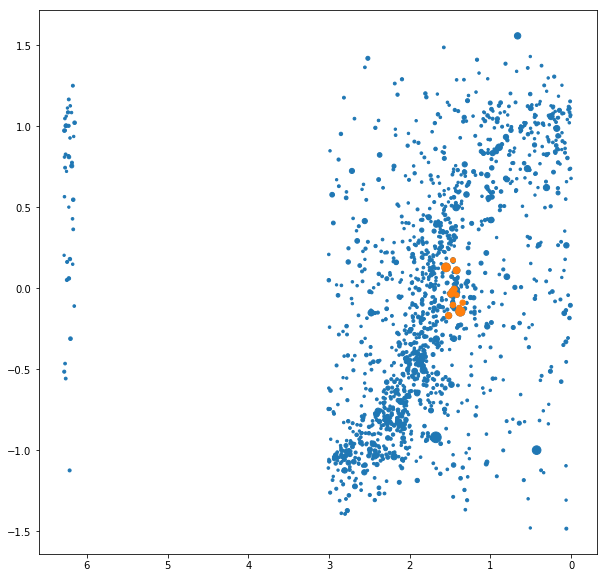

In [199]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.invert_xaxis()
ax.scatter(ra,dec,s=flx)
ax.scatter(ra_m,dec_m,s=flx_m)

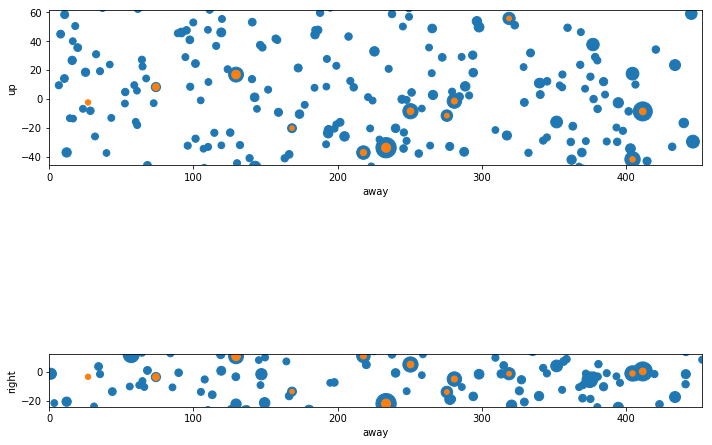

In [200]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)
x_max = np.max(x_m)*1.1
y_max = np.max(y_m)*1.1
z_max = np.max(z_m)*1.1
y_min = np.min(y_m)*1.1
z_min = np.min(z_m)*1.1
ax.set_xlim([0.0,x_max])
ax.set_ylim([z_min,z_max])
ax.set_ylabel("up")
ax.set_xlabel("away")
ax.set_aspect("equal")
ax.scatter(x,z,s=50000*lum)
ax.scatter(x_m,z_m,s=flx_m);
    
    
ax = fig.add_subplot(212)
ax.set_xlim([0.0,x_max])
ax.set_ylim([y_min,y_max])
ax.set_ylabel("right")
ax.set_aspect("equal")
ax.set_xlabel("away")
ax.scatter(x,y,s=50000*lum);
ax.scatter(x_m,y_m,s=flx_m);
fig.tight_layout()  

/Users/rein/git/rebound/venv/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


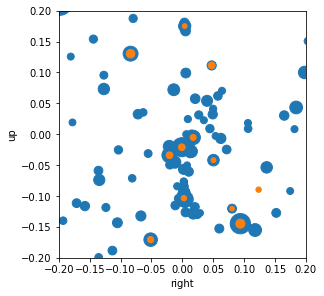

In [207]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)
x_max = np.max(x_m)*1.1
y_max = np.max(y_m)*1.1
z_max = np.max(z_m)*1.1
y_min = np.min(y_m)*1.1
z_min = np.min(z_m)*1.1
ax.set_xlim([-0.2,0.2])
ax.set_ylim([-0.2,0.2])
ax.set_ylabel("up")
ax.set_xlabel("right")
ax.set_aspect("equal")
ax.scatter(-y/x,z/x,s=50000*lum)
ax.scatter(-y_m/x_m,z_m/x_m,s=flx_m);
    